# Extract the PSF  some stars in HD158485 field
=====================================================================

- Creation : Friday 2016 June 24th
- Author Sylvie Dagoret-Campagne 
- affiliation : LAL/IN2P3/CNRS

PSF of HD163466 with grating


## 1) Import package

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [2]:
import photutils
from astropy.stats import sigma_clipped_stats
from photutils import daofind
from photutils import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

In [3]:
#photutils.test()

In [4]:
from scipy import stats 
from scipy import ndimage
import os
from datetime import datetime, timedelta

In [5]:
import libMonocamBaseImages           # my tool library written to do that CCD reduction

In [6]:
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print 'standard date format for the analysis :',datestr
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print 'fits date format for the analysis : ',date_of_analysis

standard date format for the analysis : 2016-07-06 11:31:48.398435
fits date format for the analysis :  2016-07-06T11:31:48


## 3) Configuration of the input file

- HD158485_grat_science.fits
- HD159222_grat_science.fits
- HD163466_grat_science.fits


In [7]:
#object_name='HD158485_grat_20'
#object_name='HD159222_grat'
object_name='HD158485_grat'

In [8]:
path='./HD158485_grat'
basefilename='AssScImHD158485_grat_1.fits' # check master bias
filename=os.path.join(path,basefilename)

## 4) Read the images

In [9]:
allimages = []
ccd_chan = ccdproc.CCDData.read(filename, hdu=0,unit='adu') 
allimages.append(ccd_chan)

data=ccd_chan.data

## 5) Shows the images

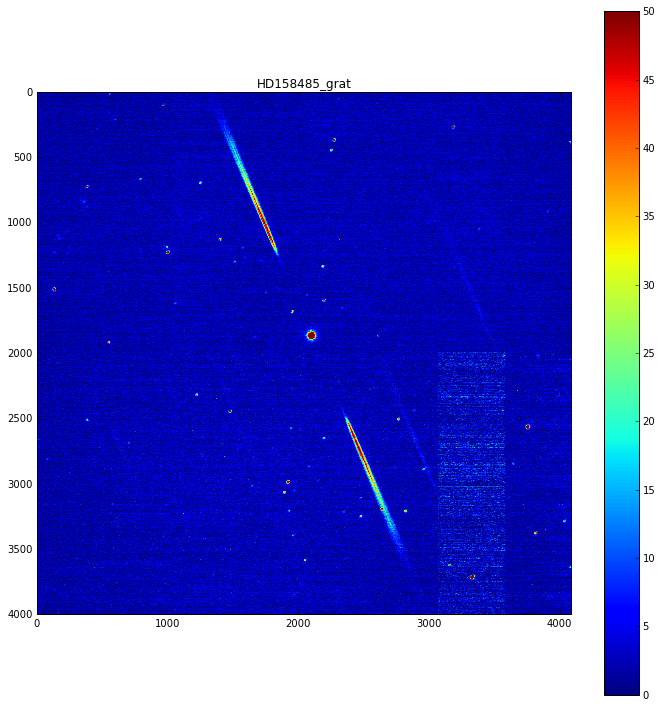

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
img=ax.imshow(ccd_chan,vmin=0,vmax=50.)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)
#plt.savefig(outputfigfilename3)

# 6) Subtract background

code implemented from photutil information there:
https://photutils.readthedocs.io/en/latest/photutils/background.html#

In [11]:
from photutils.background import Background2D
bkg = Background2D(data, (100, 100), filter_size=(3, 3),method='median')

### does the background varies over the field of view ?

In [12]:
print('median background = ',bkg.background_median)
print('median rms = ',bkg.background_rms_median)

('median background = ', 2.0856560681791629)
('median rms = ', 2.1436195434508374)


### Radiography of the residual background

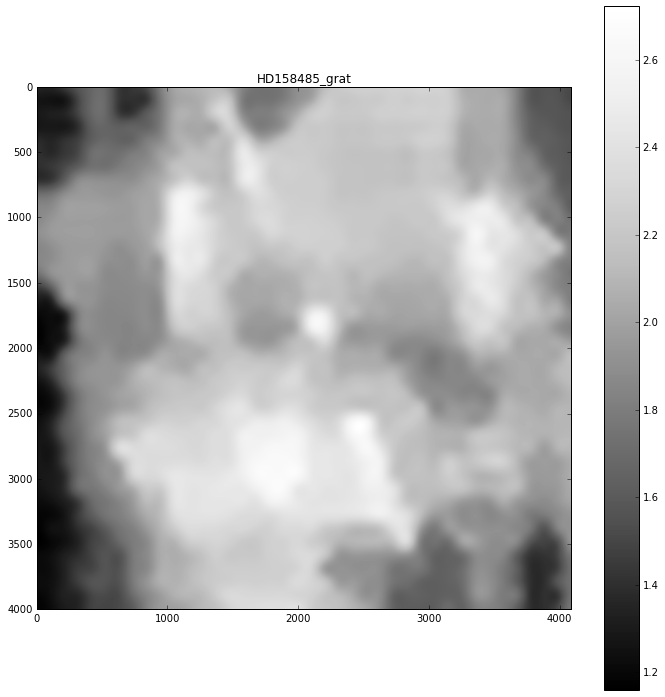

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=ax.imshow(bkg.background, cmap='Greys_r')
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

### Now subtract residual the background

In [14]:
data2=data - bkg.background

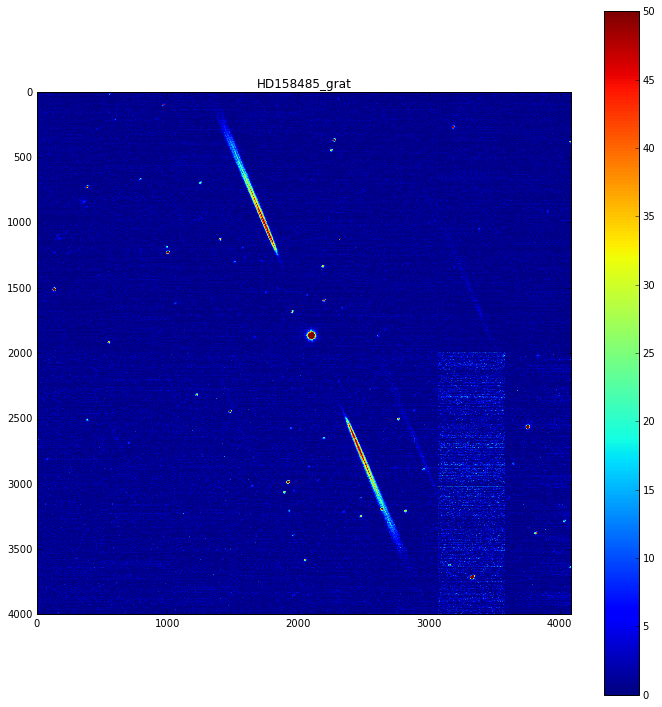

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=plt.imshow(data2, vmin=0,vmax=50.)
#img=plt.imshow(data2)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

## 8.) Compute signal and noise

In [16]:
mean, median, std = sigma_clipped_stats(data2, sigma=10.0, iters=5)    
print(mean, median, std)    

(0.083055016191056291, 0.0094303078163172627, 2.7227899205835988)


In [17]:
sources = daofind(data2 - median, fwhm=3.0, threshold=50.*std)
sources.sort('flux')
print(sources)   

 id   xcentroid     ycentroid   ...      peak          flux           mag      
--- ------------- ------------- ... ------------- ------------- ---------------
  5 134.053997168  1511.1470498 ... 387.188690065 1.12859149033 -0.131341928329
 21 3326.74095757  3721.9631687 ... 522.785429885 1.14906309156  -0.15085968783
  1 2318.39215149 1127.50199218 ... 154.182307255 1.19562077237 -0.193983629354
  6 126.708257626 1514.93001346 ... 452.774438299 1.27796078456 -0.266293818219
 20 3330.38004661 3717.85494866 ...  686.43436451 1.35669168308 -0.331202906638
  4  2301.0907036 1138.16514458 ... 274.760228368 1.38197912406 -0.351253706773
  3 2309.41793424 1135.77146036 ... 225.851203182 1.69256208587 -0.571361520657
  2 2313.12932577 1132.30927013 ... 299.905574243 1.72381539802 -0.591226889347
 19  3317.8295916 3718.19252041 ...  710.47060726 1.90665439842 -0.700679949105
 18 3327.81820821  3717.1270695 ... 1117.37517075 2.15949721572   -0.8358816211
 15  3743.2757047 2568.14696626 ... 851.

In [18]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
5,134.053997168,1511.1470498,0.447591789763,-0.976298379683,-0.501661223049,25.0,0.0,387.188690065,1.12859149033,-0.131341928329
21,3326.74095757,3721.9631687,0.412604368747,-0.125233101061,0.898440301419,25.0,0.0,522.785429885,1.14906309156,-0.15085968783
1,2318.39215149,1127.50199218,0.500142021174,-0.956260828607,-0.175804061288,25.0,0.0,154.182307255,1.19562077237,-0.193983629354
6,126.708257626,1514.93001346,0.482913372874,-0.073467249123,0.863043961607,25.0,0.0,452.774438299,1.27796078456,-0.266293818219
20,3330.38004661,3717.85494866,0.437283592664,-0.122983864047,-0.670345537652,25.0,0.0,686.43436451,1.35669168308,-0.331202906638
4,2301.0907036,1138.16514458,0.864867705619,-0.478496676058,-0.922839153847,25.0,0.0,274.760228368,1.38197912406,-0.351253706773
3,2309.41793424,1135.77146036,0.532640620357,-0.74643526184,-0.273668893548,25.0,0.0,225.851203182,1.69256208587,-0.571361520657
2,2313.12932577,1132.30927013,0.85683015217,-0.728330263714,-0.0539322750806,25.0,0.0,299.905574243,1.72381539802,-0.591226889347
19,3317.8295916,3718.19252041,0.396760571181,-0.999064049073,0.124486196797,25.0,0.0,710.47060726,1.90665439842,-0.700679949105


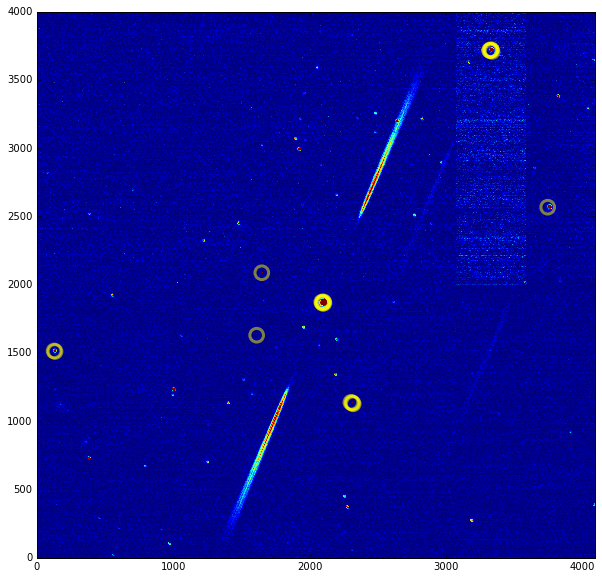

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=50.)
norm = ImageNormalize(stretch=SqrtStretch())
ax.imshow(data2,vmin=0,vmax=50.,origin='lower')
#ax.imshow(data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='yellow', lw=3., alpha=0.5)

### For example shows the 25 first stars

In [20]:
NBSTARS=25
XX=np.zeros(NBSTARS)
YY=np.zeros(NBSTARS)



selected_stars=sources.as_array()
NBFOUNDSTARS=np.min([NBSTARS,selected_stars.shape[0]])

for istar in range(NBFOUNDSTARS):
    XX[istar] = int(selected_stars[istar][1])
    YY[istar] = int(selected_stars[istar][2])   
    print XX[istar],YY[istar]

134.0 1511.0
3326.0 3721.0
2318.0 1127.0
126.0 1514.0
3330.0 3717.0
2301.0 1138.0
2309.0 1135.0
2313.0 1132.0
3317.0 3718.0
3327.0 3717.0
3743.0 2568.0
3335.0 3708.0
1648.0 2087.0
3319.0 3714.0
1611.0 1630.0
2099.0 1872.0
2093.0 1864.0
2087.0 1873.0
2101.0 1873.0
2103.0 1864.0
2091.0 1870.0


## Work with one PSF of one star

In [21]:
# Extract the plot of a PSF
index=0

onepsf=data2[YY[index]-10:YY[index]+10,XX[index]-10:XX[index]+10]
onepsfX=onepsf.sum(axis=0)
onepsfY=onepsf.sum(axis=1)

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


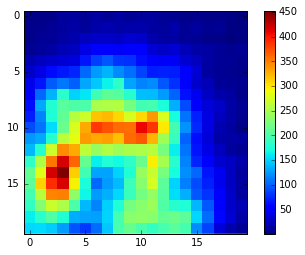

In [22]:
im=plt.imshow(onepsf,interpolation='None')
#im=plt.imshow(onepsf)
plt.colorbar(im)

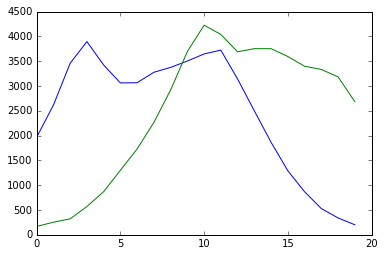

In [23]:
plt.plot(onepsfX)
plt.plot(onepsfY)

In [24]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, np.sqrt(variance))

In [25]:
DELTA_NBINSX=10
DELTA_NBINSY=10

In [26]:
weighted_avg_and_std(np.arange(onepsfX.shape[0]),onepsfX)

(7.5585791643602462, 4.519174370686331)

In [27]:
weighted_avg_and_std(np.arange(onepsfY.shape[0]),onepsfY)

(12.080453555866974, 4.2708239247013911)

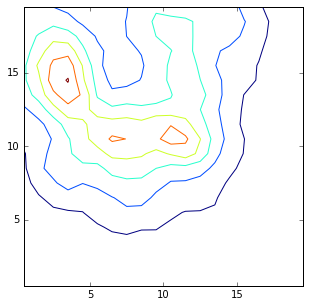

In [28]:
plt.figure(figsize=(5,5))
#onepsf2 = onepsf / np.linalg.norm(onepsf, axis=-1)[:, np.newaxis]
onepsf2 = onepsf / np.sum(onepsf)
levels=np.array([1,0.682,0.75,0.89,0.94,0.96,0.97])
#plt.contour(onepsf2,levels=levels,origin='lower') matmpltlib bug
plt.contour(onepsf2,origin='lower')

In [29]:
XV=np.arange(2*DELTA_NBINSX)-DELTA_NBINSX
YV=np.arange(2*DELTA_NBINSY)-DELTA_NBINSY
Xgrid,Ygrid=np.meshgrid(XV,YV)

In [30]:
weighted_avg_and_std(Xgrid,onepsf2)

(-2.4414208356397546, 4.5191743706863301)

In [31]:
weighted_avg_and_std(Ygrid,onepsf2)

(2.080453555866971, 4.2708239247013902)

### Estimation of PRF (PSF) for a bunch of stars


I could not use any of the utilities function.
It lacks of working examples

In [32]:
import photutils.psf 
from photutils.psf import psf_photometry

In [33]:
from astropy.modeling import models, fitting

In [34]:
import photutils
from photutils import psf

photutils.__version__

u'0.3.dev1833'

### Extraction of a few stars for visualization

In [35]:
DELTA_NBINSX=10
DELTA_NBINSY=10

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


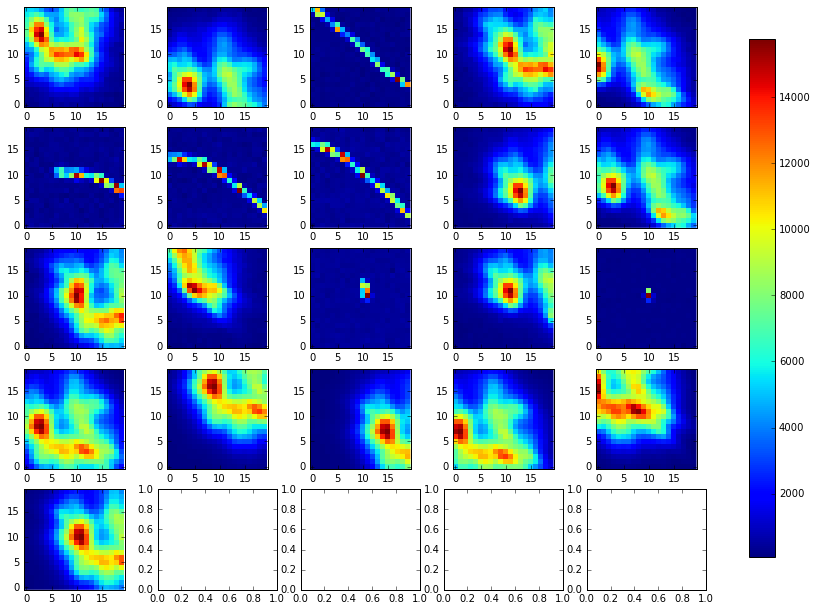

In [36]:
fig, axes = plt.subplots(nrows=5, ncols=5)
fig.set_size_inches(12, 9)
# Plot kernels
for i in range(5):
    for j in range(5):
        index=5*i+j
        if index <NBFOUNDSTARS :
            prf_image = data2[YY[index]-DELTA_NBINSY:YY[index]+DELTA_NBINSY,XX[index]-DELTA_NBINSX:XX[index]+DELTA_NBINSX]
            im = axes[i, j].imshow(prf_image, interpolation='None',origin='lower')
			
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
plt.colorbar(im, cax=cax)
plt.subplots_adjust(left=0.05, right=0.85, top=0.95, bottom=0.05)
plt.show()

In [37]:
selected_stars=sources.as_array()

NB_OF_STARS=selected_stars.shape[0]
SIGMAX_OF_STARS=np.zeros(NB_OF_STARS)
SIGMAY_OF_STARS=np.zeros(NB_OF_STARS)
for istar in range(selected_stars.shape[0]):
    XXs = int(selected_stars[istar][1])
    YYs = int(selected_stars[istar][2])   
    star_image = data2[YYs-DELTA_NBINSY:YYs+DELTA_NBINSY,XXs-DELTA_NBINSX:XXs+DELTA_NBINSX]
    thepsf = star_image / np.sum(star_image)
    SIGMAX_OF_STARS[istar]=weighted_avg_and_std(Xgrid,thepsf)[1]
    SIGMAY_OF_STARS[istar]=weighted_avg_and_std(Ygrid,thepsf)[1]

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


In [38]:
SIGMAX_OF_STARS

array([ 4.51917437,  5.38125791,  5.96589562,  4.2526447 ,  4.91648115,
        3.93408548,  5.47798547,  5.5423117 ,  3.73579991,  5.50290869,
        4.28425816,  3.77172859,  0.72769635,  4.38400106,  0.44750741,
        5.16063838,  4.47299545,  3.21216856,  4.86349394,  4.55028051,
        4.15212407])

In [39]:
SIGMAY_OF_STARS

array([ 4.27082392,  4.22533358,  5.01593585,  4.62026467,  4.80500115,
        1.20829145,  3.3432013 ,  4.28767307,  3.97180877,  4.63823471,
        4.91457833,  3.8664104 ,  1.24475199,  3.62987931,         nan,
        4.88893457,  4.05940751,  4.53687916,  4.88532971,  4.13993492,
        4.80452257])

#### Cut NAN

In [40]:
all_sigx=SIGMAX_OF_STARS[np.logical_not(np.isnan(SIGMAX_OF_STARS))]
all_sigy=SIGMAY_OF_STARS[np.logical_not(np.isnan(SIGMAY_OF_STARS))]

#### Cut too low values

In [41]:
all_sigx=all_sigx[all_sigx>2.0]
all_sigy=all_sigy[all_sigy>2.0]

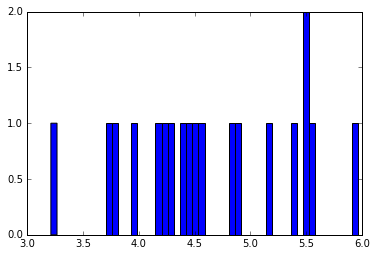

In [42]:
h1=plt.hist(all_sigx,50)

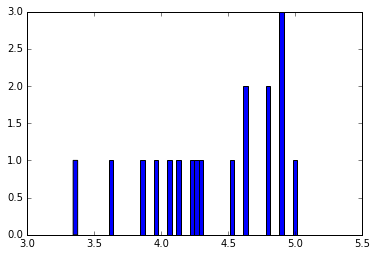

In [43]:
h1=plt.hist(all_sigy,50)

In [44]:
all_sigx.mean()

4.6358017758765211

In [45]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigx.mean(),all_sigx.std(),all_sigx.mean()*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigy.mean(),all_sigy.std(),all_sigy.mean()*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 4.64 +/- 0.71 pixels ==> psf  4.38 +/- 0.65 arcsec 
average prf(y) = 4.38 +/- 0.47 pixels ==> psf  4.14 +/- 0.43 arcsec 


In [46]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigx),all_sigx.std(),np.median(all_sigx)*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigy),all_sigy.std(),np.median(all_sigy)*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 4.52 +/- 0.71 pixels ==> psf  4.27 +/- 0.65 arcsec 
average prf(y) = 4.41 +/- 0.47 pixels ==> psf  4.17 +/- 0.43 arcsec 
